<a href="https://colab.research.google.com/github/itorrescardenas/sentiment-analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de sentimiento

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
data4= pd.read_csv("/content/drive/MyDrive/bq-results-20240316-062742-1710570470194/bq-results-20240316-062742-1710570470194.csv")

In [ ]:
data4

,product_id,product_name,category,sub_category,discounted_price,actual_price,discount_percentage,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating,rating_count,rating_1,rating_count_1,rating_score
0,B0B82YGCF6,Tokdis MX-1 Pro Bluetooth Calling Smartwatch -...,Electronics,WearableTechnology,899.0,3499.0,0.74,Bluetooth Calling Watch Tokdis MX Pro enables ...,"AFEMYJODFSKRPR4XTYKCPXMCO4YA,AH7PGDCSET6C5NOBB...",Gourav ChoudhraniMustak aliAmitPankaj solankiy...,"RGEDIZCX7LB34,R19GGFEAAXAUKK,R3L3EFRRM8X2IY,RE...",Its is good but battery life is very poorHeart...,"Its is value for money,,Good product,Good, lik...",1,1,3.0,681,3.0,681,Promedio
1,B0BBVKRP7B,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,Electronics,WearableTechnology,281.0,1999.0,0.86,Allday activity tracking Track steps distance...,"AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q...",dk yadavMUKESH KUMAR VERMAVishnuShaikh Shahala...,"RQOWF9MFTN6CQ,R23B5JORWWE85P,R3SB0VOD36AXI0,R2...",Very Good prodatBattery life is dayGoodWhere ...,"Good Prodat,Battery life is so bad.,Nice produ...",1,1,2.8,87,2.8,87,Por debajo del promedio
2,B09F6D21BY,7SEVEN Compatible LG TV Remote Suitable for LG...,Electronics,"HomeTheater,TV&Video",790.0,1999.0,0.60,for LG TV series All Models of Remote Control ...,"AH7NTBDGAMGOFFADEVWJL3O4YQ2A,AEJUIUF6CYKRBWLSO...",Jarlina NathSonaRanjit HarchekarMyneni Suneeta...,"R1S2PH1JD9B9XB,R3UUKCS12Q0B9X,R16YH8SVJU5W61,R...",Not goodNo voice recognition No pointer ray as...,The mouse feature of the remote is not working...,1,1,3.0,103,3.0,103,Promedio
3,B08RX8G496,LRIPL Mi Remote Control with Netflix & Prime V...,Electronics,"HomeTheater,TV&Video",655.0,1099.0,0.40,This Voice Command Compatible Remote is for Mi...,"AHGHFJXREBY4F2LI3M6SFLSWC75Q,AFZWM3VVEIMWNFSTQ...",Girija MohapatraShanChanJai AshvanSandeep NDig...,"RSFPLEMO7DSOR,RG7SBYTNG42XA,ROR2RQZ4G72JO,R12G...",Rmote for MI TVGoodGood but low qualityRemote ...,TV remote is the replica of the original one s...,1,1,3.2,285,3.2,285,Promedio
4,B08TT63N58,ROYAL STEP - AMAZON'S BRAND - Portable Electri...,Home&Kitchen,Kitchen&HomeAppliances,499.0,2199.0,0.77,Portable Convenient to Charge This little bod...,"AH6P2FS36YMFXR6BCZY4QI3A5EGQ,AHLSHAJTU5B4XBPJG...",Amazon CustomerAmazon CustomerFarhana sherin k...,"RUIKGKRD5Y2WM,RS2SWNB31NQTZ,R1F2SW4YE5GUXJ,R1F...",Running Time is lessNot much usefulGood oneNot...,"Average products,This isn’t useful for smoothi...",0,0,3.1,3527,3.1,3527,Promedio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,B09WN3SRC7,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,Electronics,"HomeTheater,TV&Video",77990.0,139900.0,0.44,Resolution K Ultra HD x Refresh Rate Hertz...,"AF6Z2OYIXRPZJHVYN2MFKKYHPHFQ,AH5SAORYVUN5MGIBL...",David PDr ATUL THAKURShriniwas PatilTahir AliH...,"R16HCZ0W1TRSMM,R12J7UKQ0FX3O9,R8729SR7LQFUU,R1...",Product installation was excellent but delive...,The delivery people were not careful with the ...,1,1,4.7,5935,4.7,5935,Por encima del promedio
1347,B0BM4KTNL1,"FIGMENT Handheld Milk Frother Rechargeable, 3-...",Home&Kitchen,Kitchen&HomeAppliances,699.0,1599.0,0.56,Rechargeable MultiFunction Milk FrotherThe Mil...,"AGMHHTX7GPWHZAUTEYQOFEEDFMDQ,AEJJGJQCIEPL3ZBNU...",MovieTimeRavneet SAkashMohd AmaanPankajSajan,"R1YXOQ6ZZI33LZ,R17FVMZGPYPOYZ,R23NCERA0R891T,R...",Nice productNot as effective as claimed just a...,"Value for money,Not as effective as claimed, j...",0,0,4.7,1729,4.7,1729,Por encima del promedio
1348,B0BM9H2NY9,Multifunctional 2 in 1 Electric Egg Boiling St...,Home&Kitchen,Kitchen&HomeAppliances,699.0,1599.0,0.56,Egg Frying Pan,"AFZ2YKWX4KR7MWSA6UOMEGGHT32A,AEP6WZ7AR6XDQSBFS...",Nitin GVeerasomacharyRoshanKunwar Indranshu Si...,"R2DHTJGY77MOP0,R36IXNHZC037AW,R3GPHUMRV75VWK,R...",Amazing Value for moneyVery easy to use in Goo...,"Worth buying for eggetarians,Working great so ...",0,0,4.7,2300,4.7,2300,Por encima del promedio
1349,B0BLC2BYPX,Zuvexa USB Rechargeable 


Este fragmento de código es una serie de importaciones y configuraciones iniciales necesarias para llevar a cabo un análisis de texto y construir modelos de aprendizaje automático para tareas relacionadas con el procesamiento del lenguaje natural (NLP, por sus siglas en inglés).

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 4.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Para lematizar
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji

# Descargar el recurso 'stopwords' si no está presente
nltk.download('stopwords')
# Descargar el recurso 'wordnet' si no está presente
nltk.download('wordnet')

%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
sns.set_style("darkgrid")
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import re, string, nltk
import emoji, bz2
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

# Aplicar el código al DataFrame data4


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def clean_text(data4, review_content, review_content_clean):
    data4[review_content_clean] = data4[review_content].str.replace(r"@", " at ")
    data4[review_content_clean] = data4[review_content_clean].str.replace("#[^a-zA-Z0-9_]+"," ")
    data4[review_content_clean] = data4[review_content_clean].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
    data4[review_content_clean] = data4[review_content_clean].str.replace(r"http\S+","")
    data4[review_content_clean] = data4[review_content_clean].str.lower()

    return data4

Este fragmento de código tiene como objetivo visualizar las columnas original y limpia de un DataFrame después de aplicar la función clean_text que hemos definido anteriormente. Esto puede ayudarte a comprender cómo ha cambiado el texto después del proceso de limpieza.

In [ ]:
# Visualizar las columnas original y limpia
review_content = "review_content"
review_content_clean = "review_content_clean"

clean_text(data4, review_content, review_content_clean)

# Visualizar las columnas original y limpia
print(data4[[review_content, review_content_clean]])

                                         review_content  \
0     Its is value for money,,Good product,Good, lik...   
1     Good Prodat,Battery life is so bad.,Nice produ...   
2     The mouse feature of the remote is not working...   
3     TV remote is the replica of the original one s...   
4     Average products,This isn’t useful for smoothi...   
...                                                 ...   
1346  The delivery people were not careful with the ...   
1347  Value for money,Not as effective as claimed, j...   
1348  Worth buying for eggetarians,Working great so ...   
1349  The first time I tried it send the eggs and th...   
1350  I like instant heating, I didn't get warranty ...   

                                   review_content_clean  
0     its is value for money,,good product,good, lik...  
1     good prodat,battery life is so bad ,nice produ...  
2     the mouse feature of the remote is not working...  
3     tv remote is the replica of the original one s...  
4

In [ ]:
# Inicialización del lematizador
lemmatizer = WordNetLemmatizer()
i = 0

# Definición de la función preprocess_text
def preprocess_text(text):
    global i
    if i % 100 == 0:
        print(i)
    i += 1
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = emoji.demojize(text)
    text = [lemmatizer.lemmatize(word) for word in text.split() if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

# Aplicación de preprocess_text a la columna review_content_clean de data4
data4["review_content_clean"] = data4["review_content_clean"].apply(preprocess_text)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300


In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

data5 = data4[['product_id','review_title','review_content_clean']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Puntaje de polaridad
Los puntajes de polaridad son valores numéricos que representan la polaridad de un texto, es decir, si el texto expresa sentimientos positivos, negativos o neutrales. Estos puntajes son calculados por herramientas de análisis de sentimientos, como el analizador Vader que se utiliza en este contexto.

In [ ]:
res = {}

for i, row in tqdm(data4.iterrows(), total=len(data5)):
    review_desc =row['review_content_clean']
    myid = row['product_id']
    res[myid] = sia.polarity_scores(review_desc)

  0%|          | 0/1351 [00:00<?, ?it/s]

Este código toma los puntajes de polaridad calculados para cada ID de producto, los convierte en un DataFrame de pandas y los organiza de manera que cada fila represente un ID de producto con sus respectivos puntajes de polaridad. Luego, reindexa el DataFrame y renombra la columna del índice a 'product_id' para hacerlo más legible y utilizable.








In [ ]:
pol_score = pd.DataFrame(res).T
pol_score = pol_score.reset_index().rename(columns={'index' : 'product_id'})

pol_score

,product_id,neg,neu,pos,compound
0,B0B82YGCF6,0.052,0.644,0.304,0.9633
1,B0BBVKRP7B,0.144,0.676,0.180,0.1027
2,B09F6D21BY,0.178,0.575,0.246,0.6808
3,B08RX8G496,0.076,0.690,0.234,0.9565
4,B08TT63N58,0.025,0.686,0.289,0.9685
...,...,...,...,...,...
1346,B09WN3SRC7,0.051,0.688,0.260,0.9978
1347,B0BM4KTNL1,0.105,0.546,0.349,0.9423
1348,B0BM9H2NY9,0.000,0.361,0.639,0.9854
1349,B0BLC2BYPX,0.031,0.550,0.419,0.9956


In [ ]:
# Uniendo data4 con los puntajes de polaridad.
data3 = data4.merge(pol_score, how='left')
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 0 to 1350
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1351 non-null   object 
 1   product_name          1351 non-null   object 
 2   category              1351 non-null   object 
 3   sub_category          1351 non-null   object 
 4   discounted_price      1351 non-null   float64
 5   actual_price          1351 non-null   float64
 6   discount_percentage   1351 non-null   float64
 7   about_product         1351 non-null   object 
 8   user_id               1351 non-null   object 
 9   user_name             1351 non-null   object 
 10  review_id             1351 non-null   object 
 11  review_title          1351 non-null   object 
 12  review_content        1351 non-null   object 
 13  img_link              1351 non-null   int64  
 14  product_link          1351 non-null   int64  
 15  rating               

In [ ]:
data3

,product_id,product_name,category,sub_category,discounted_price,actual_price,discount_percentage,about_product,user_id,user_name,...,rating,rating_count,rating_1,rating_count_1,rating_score,review_content_clean,neg,neu,pos,compound
0,B0B82YGCF6,Tokdis MX-1 Pro Bluetooth Calling Smartwatch -...,Electronics,WearableTechnology,899.0,3499.0,0.74,Bluetooth Calling Watch Tokdis MX Pro enables ...,"AFEMYJODFSKRPR4XTYKCPXMCO4YA,AH7PGDCSET6C5NOBB...",Gourav ChoudhraniMustak aliAmitPankaj solankiy...,...,3.0,681,3.0,681,Promedio,value money good product good liked charging l...,0.052,0.644,0.304,0.9633
1,B0BBVKRP7B,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,Electronics,WearableTechnology,281.0,1999.0,0.86,Allday activity tracking Track steps distance...,"AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q...",dk yadavMUKESH KUMAR VERMAVishnuShaikh Shahala...,...,2.8,87,2.8,87,Por debajo del promedio,good prodat battery life bad nice product disl...,0.144,0.676,0.180,0.1027
2,B09F6D21BY,7SEVEN Compatible LG TV Remote Suitable for LG...,Electronics,"HomeTheater,TV&Video",790.0,1999.0,0.60,for LG TV series All Models of Remote Control ...,"AH7NTBDGAMGOFFADEVWJL3O4YQ2A,AEJUIUF6CYKRBWLSO...",Jarlina NathSonaRanjit HarchekarMyneni Suneeta...,...,3.0,103,3.0,103,Promedio,mouse feature remote working remote control pu...,0.178,0.575,0.246,0.6808
3,B08RX8G496,LRIPL Mi Remote Control with Netflix & Prime V...,Electronics,"HomeTheater,TV&Video",655.0,1099.0,0.40,This Voice Command Compatible Remote is for Mi...,"AHGHFJXREBY4F2LI3M6SFLSWC75Q,AFZWM3VVEIMWNFSTQ...",Girija MohapatraShanChanJai AshvanSandeep NDig...,...,3.2,285,3.2,285,Promedio,tv remote replica original one supplied tv ori...,0.076,0.690,0.234,0.9565
4,B08TT63N58,ROYAL STEP - AMAZON'S BRAND - Portable Electri...,Home&Kitchen,Kitchen&HomeAppliances,499.0,2199.0,0.77,Portable Convenient to Charge This little bod...,"AH6P2FS36YMFXR6BCZY4QI3A5EGQ,AHLSHAJTU5B4XBPJG...",Amazon CustomerAmazon CustomerFarhana sherin k...,...,3.1,3527,3.1,3527,Promedio,average product useful smoothy good lassi cold...,0.025,0.686,0.289,0.9685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,B09WN3SRC7,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,Electronics,"HomeTheater,TV&Video",77990.0,139900.0,0.44,Resolution K Ultra HD x Refresh Rate Hertz...,"AF6Z2OYIXRPZJHVYN2MFKKYHPHFQ,AH5SAORYVUN5MGIBL...",David PDr ATUL THAKURShriniwas PatilTahir AliH...,...,4.7,5935,4.7,5935,Por encima del promedio,delivery people careful unpacking amazon need ...,0.051,0.688,0.260,0.9978
1347,B0BM4KTNL1,"FIGMENT Handheld Milk Frother Rechargeable, 3-...",Home&Kitchen,Kitchen&HomeAppliances,699.0,1599.0,0.56,Rechargeable MultiFunction Milk FrotherThe Mil...,"AGMHHTX7GPWHZAUTEYQOFEEDFMDQ,AEJJGJQCIEPL3ZBNU...",MovieTimeRavneet SAkashMohd AmaanPankajSajan,...,4.7,1729,4.7,1729,Por encima del promedio,value money effective claimed average product ...,0.105,0.546,0.349,0.9423
1348,B0BM9H2NY9,Multifunctional 2 in 1 Electric Egg Boiling St...,Home&Kitchen,Kitchen&HomeAppliances,699.0,1599.0,0.56,Egg Frying Pan,"AFZ2YKWX4KR7MWSA6UOMEGGHT32A,AEP6WZ7AR6XDQSBFS...",Nitin GVeerasomacharyRoshanKunwar Indranshu Si...,...,4.7,2300,4.7,2300,Por encima del promedio,worth buying eggetarians working great far val...,0.000,0.361,0.639,0.9854
1349,B0BLC2BYPX,Zuvexa USB Rechargeable Electric Foam Maker - ...,Home&Kitchen,Kitchen&HomeAppliances,499.0,1299.0,0.62,The food taste stainless steel whisking head i...,"AG6AS2KLLZMPPPEKF5RIJXTMA4FA,AEW6BC4YLRYKI5OZG...",shammiRippy MittalKabeerKushVani PrabhanehaRee...,...,4.7,54,4.7,54,Por encima del promedio,first time tried send egg milk cream kitchen b...,0.031,0.550,0.419,0.9956


In [ ]:
from google.colab import files

data3.to_csv('data3.csv', index=False)
files.download('data3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

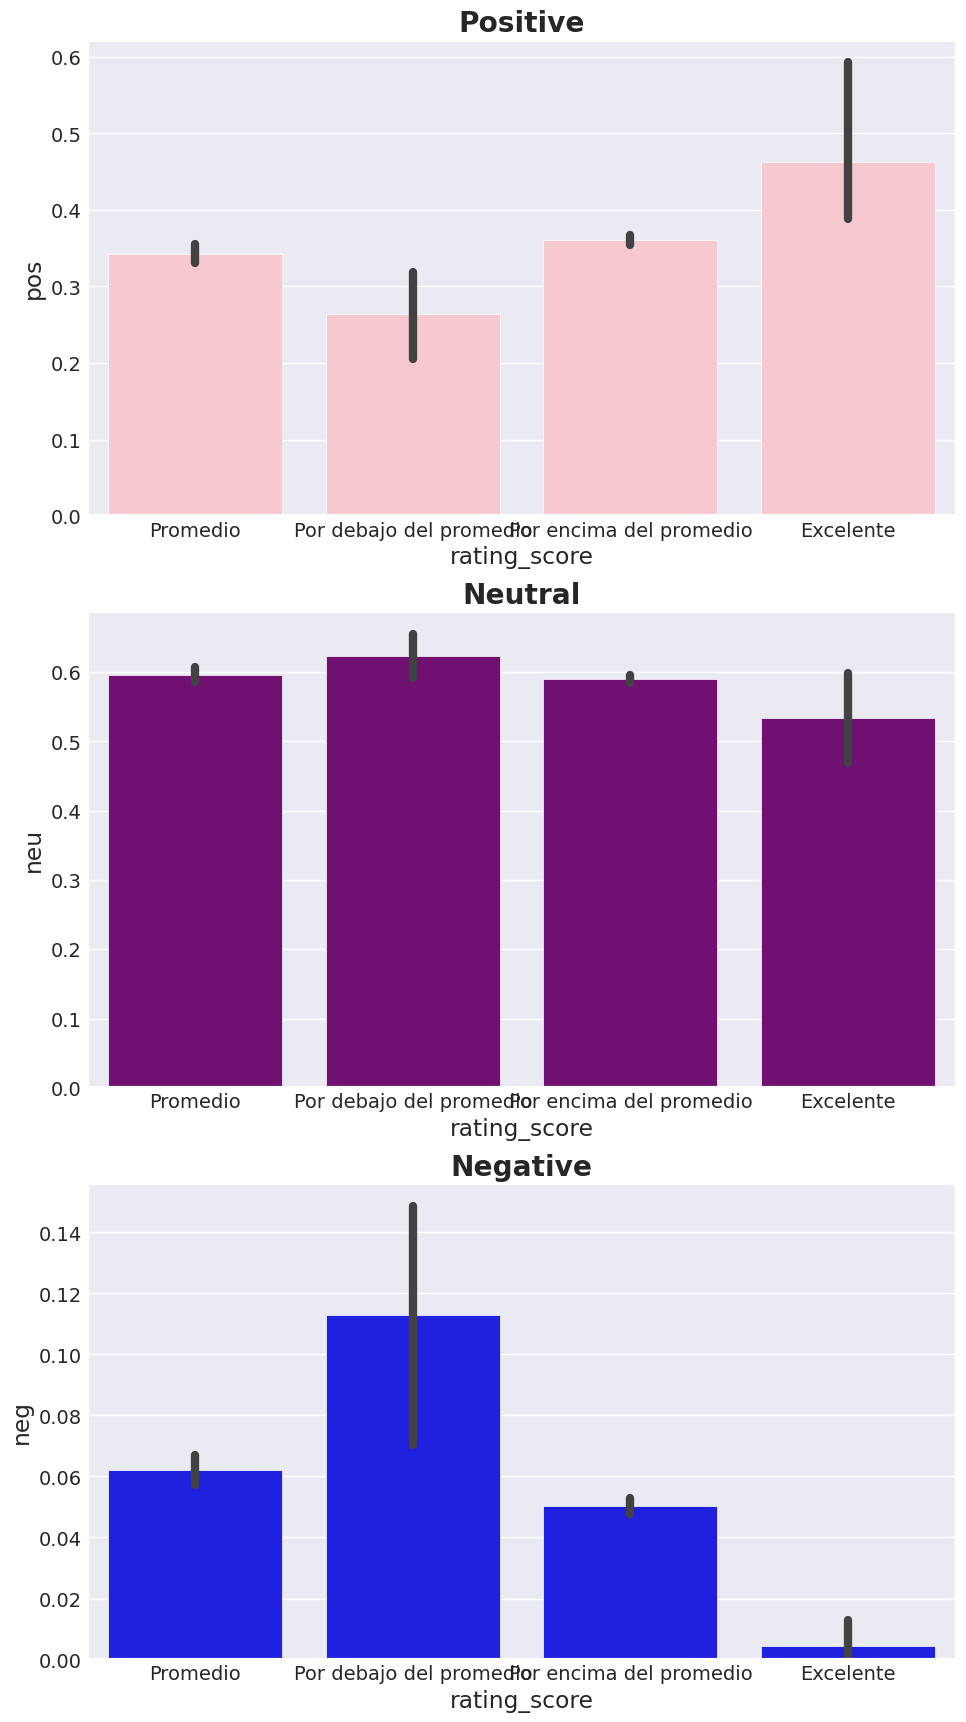

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 20))

# Colores diferentes para cada gráfico
colors = ['pink', 'purple', 'blue']

sns.barplot(data=data3, x='rating_score', y='pos', ax=ax[0], color=colors[0])
sns.barplot(data=data3, x='rating_score', y='neu', ax=ax[1], color=colors[1])
sns.barplot(data=data3, x='rating_score', y='neg', ax=ax[2], color=colors[2])

ax[0].set_title('Positive', fontweight='bold')
ax[1].set_title('Neutral', fontweight='bold')
ax[2].set_title('Negative', fontweight='bold')

plt.show()